<a href="https://colab.research.google.com/github/MOHAMMEDSHEBEEB/MOHAMMEDSHEBEEB/blob/main/DecisionTree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


df=pd.read_csv("diabetes.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


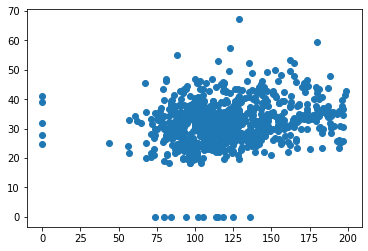

In [ ]:
plt.scatter(df['Glucose'],df['BMI'])
plt.show()

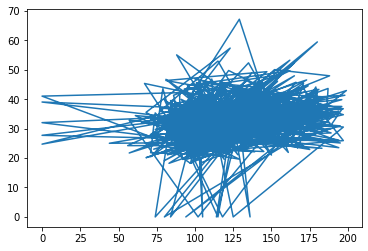

In [ ]:
plt.plot(df['Glucose'],df['BMI'])
plt.show()

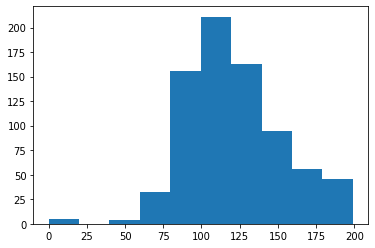

In [ ]:
plt.hist(df['Glucose'])
plt.show()

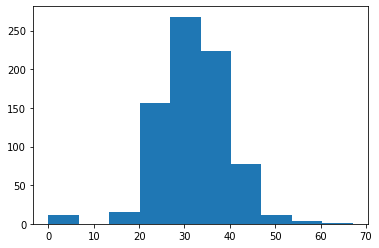

In [ ]:
plt.hist(df['BMI'])
plt.show()

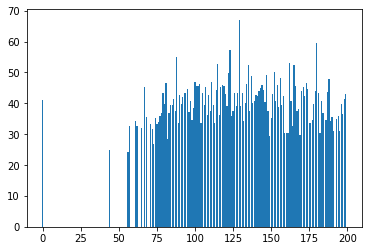

In [ ]:
plt.bar(df['Glucose'],df['BMI'])
plt.show()

<ipython-input-21-18dc601eaa6f>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(df['Glucose'])


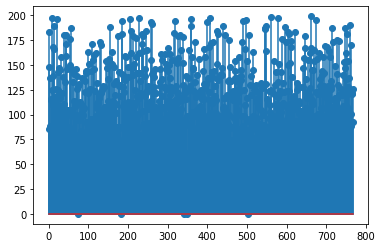

In [ ]:
plt.stem(df['Glucose'])
plt.show()

In [ ]:
#Defining values
x=df.drop('Outcome',axis=1)
y=df['Outcome']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

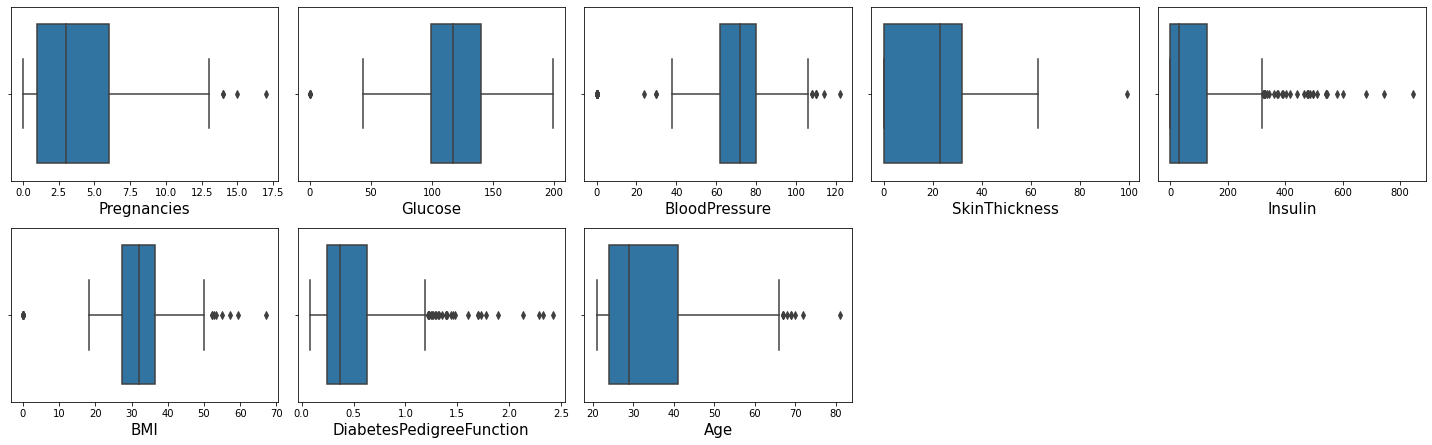

In [ ]:
#BoxPlot for entire dataset
plt.figure(figsize = (20,15))
plotnumber=1
for col in x.columns:
  if plotnumber <=9:
    ax =plt.subplot(5,5,plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col,fontsize=15)

  plotnumber +=1
plt.tight_layout()
plt.show()

In [ ]:
#missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

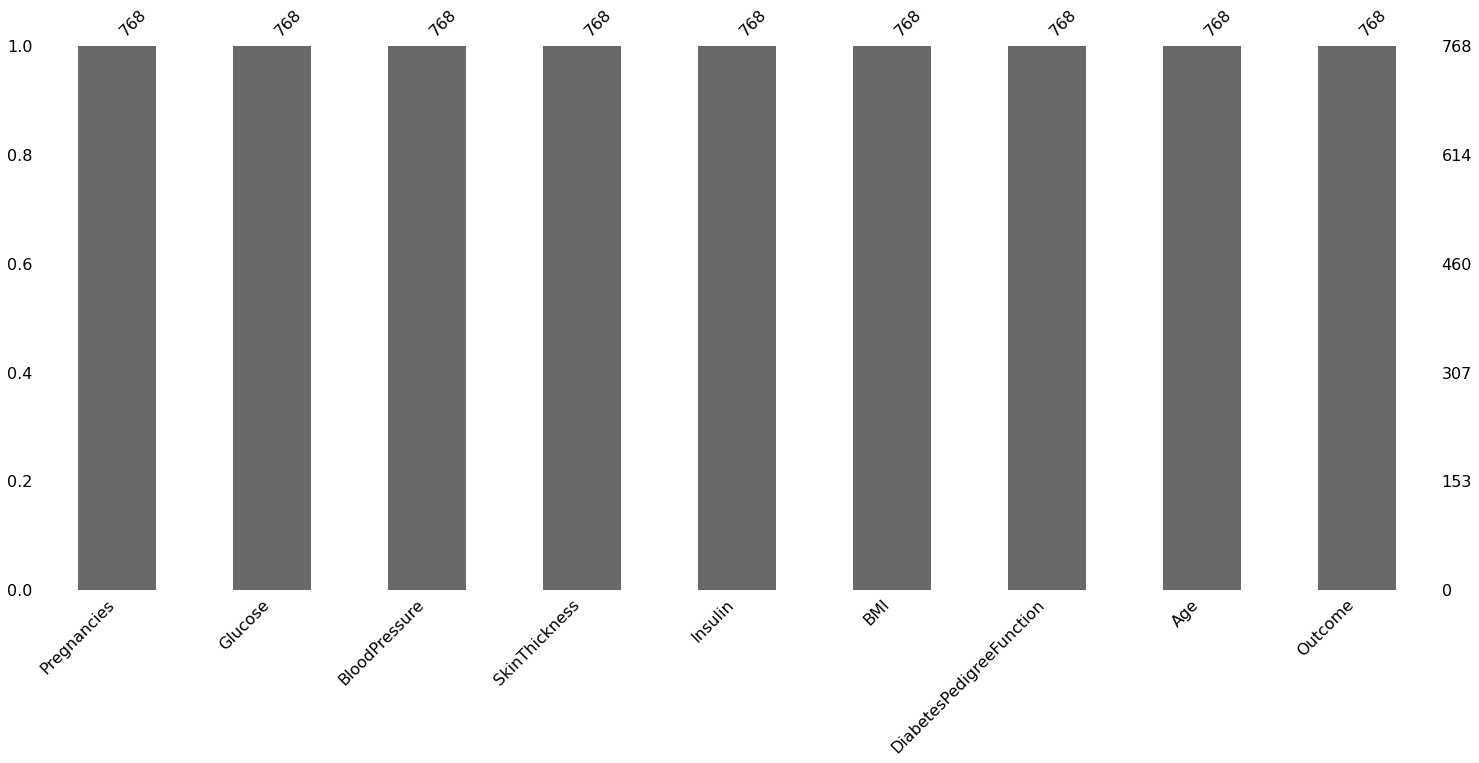

In [ ]:
#Missing Values in plt
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
#Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
#standardising
a=StandardScaler()
x_train= a.fit_transform(x_train)
x_test= a.transform(x_test)

In [ ]:
#Algorithm
#Algirthm for Training
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Algorithm for Testing
y_pred=clf.predict(x_test)

In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[198,  55],
       [ 57,  74]])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7083333333333334

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

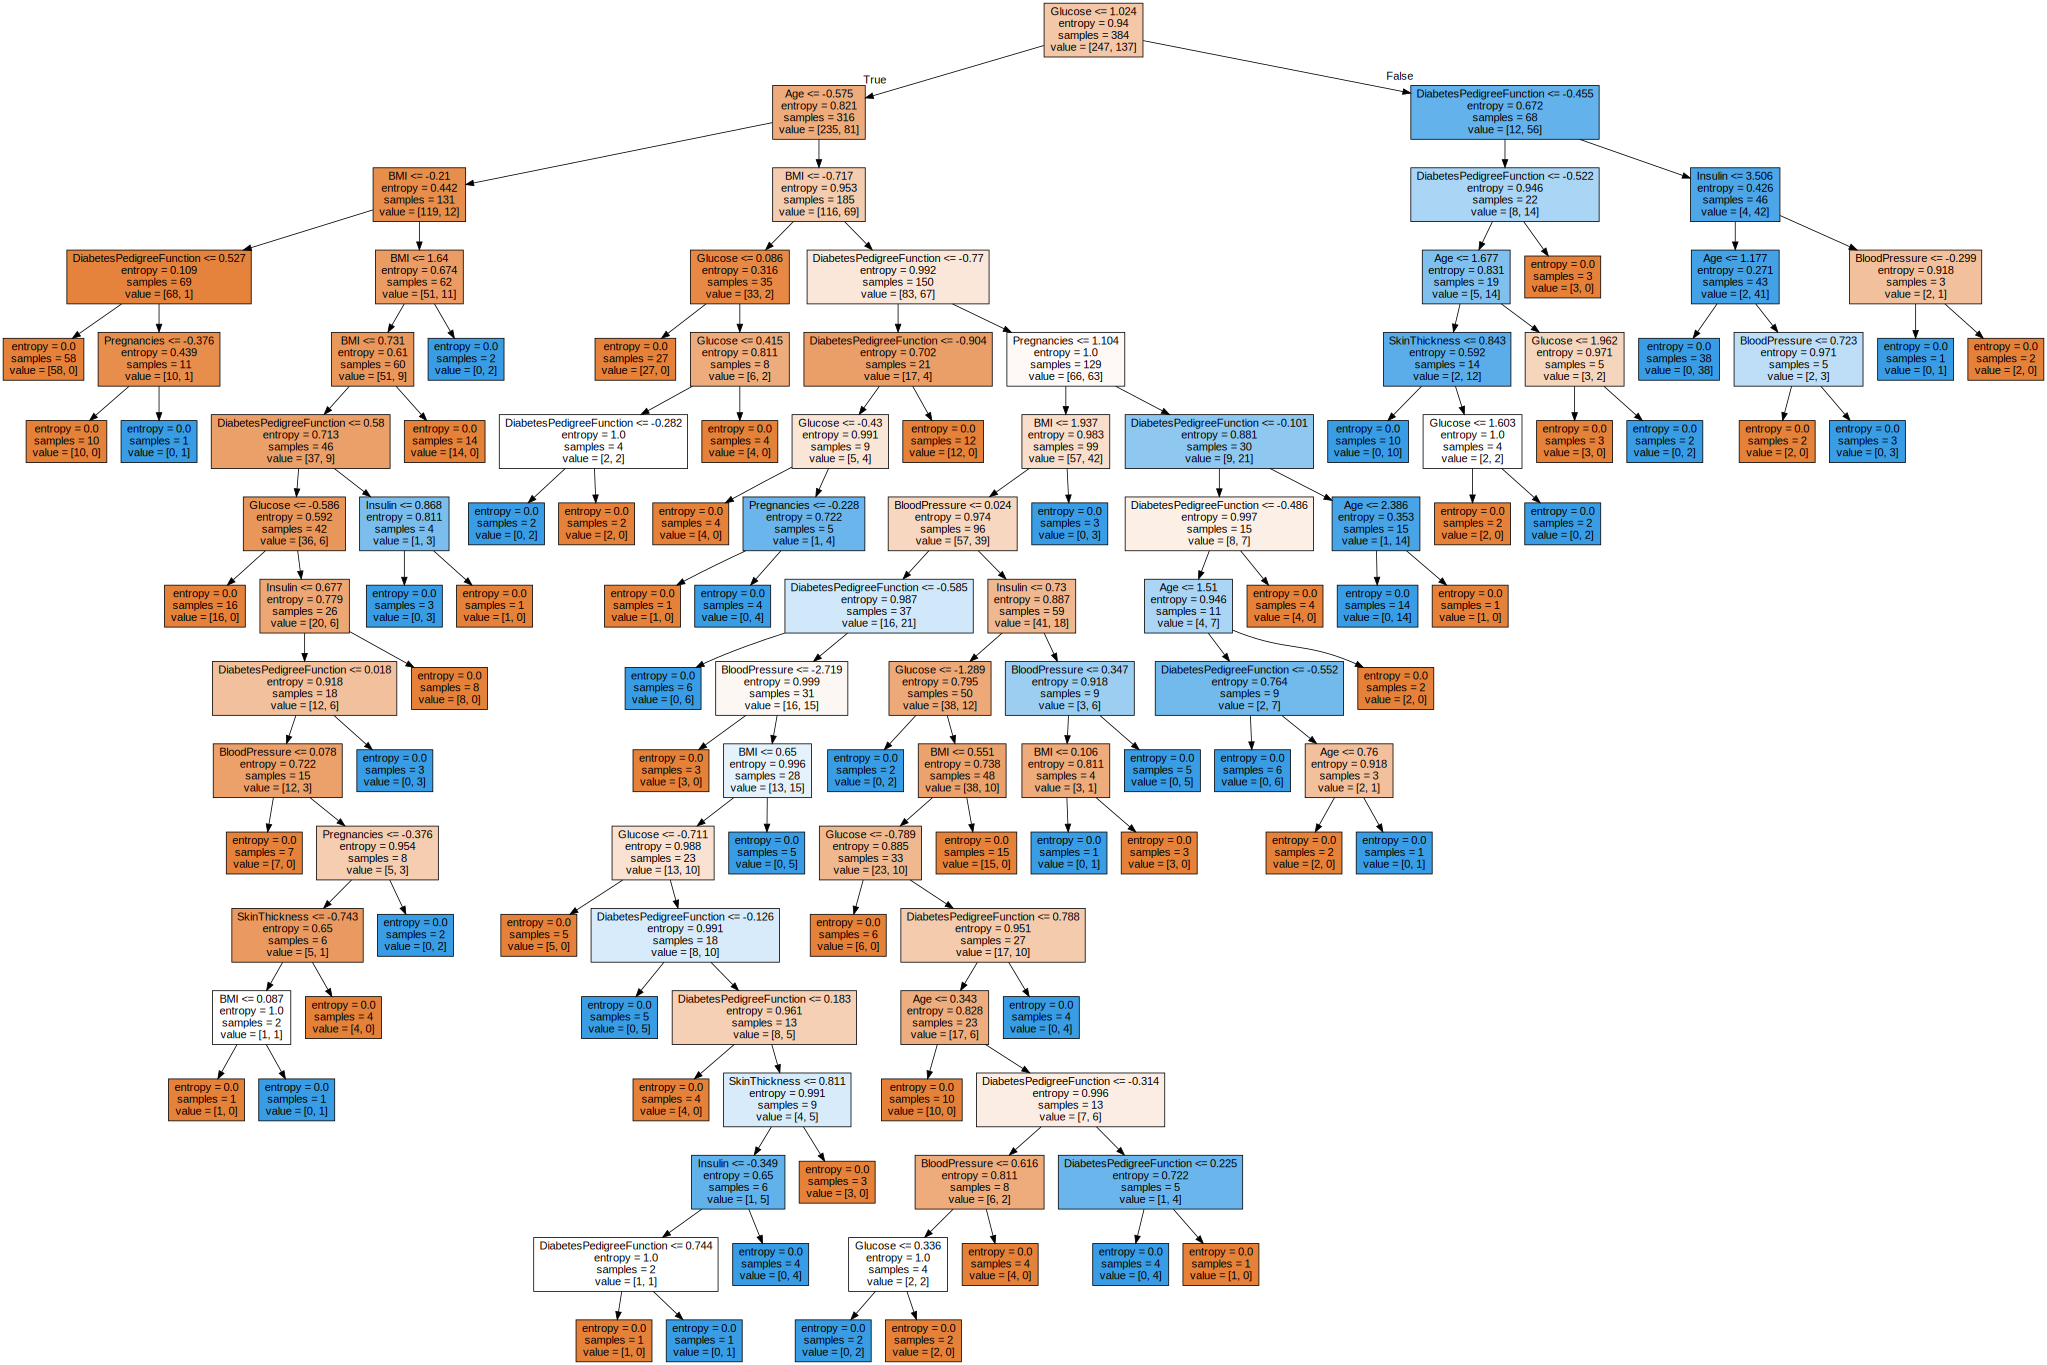

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True))